# Init

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import least_squares

## append pcrystal2 dir to path, if not in the same directory
# import sys
# sys.path.append('')

import pcrystal2

In [2]:
%matplotlib notebook

# Simple simulation

running initial simulation...
N_thrm0   N_inst    LL        tmax
0         1e+04     114.3     0.01868   
0         1e+04     114.3     0.1868    
1         9999      114.2     1.868     
10        9990      114.2     18.68     
50        9950      114.1     93.41     
99        9901      113.9     186.8     
f_inst    f_therm
99.47%    0.53%     


<IPython.core.display.Javascript object>


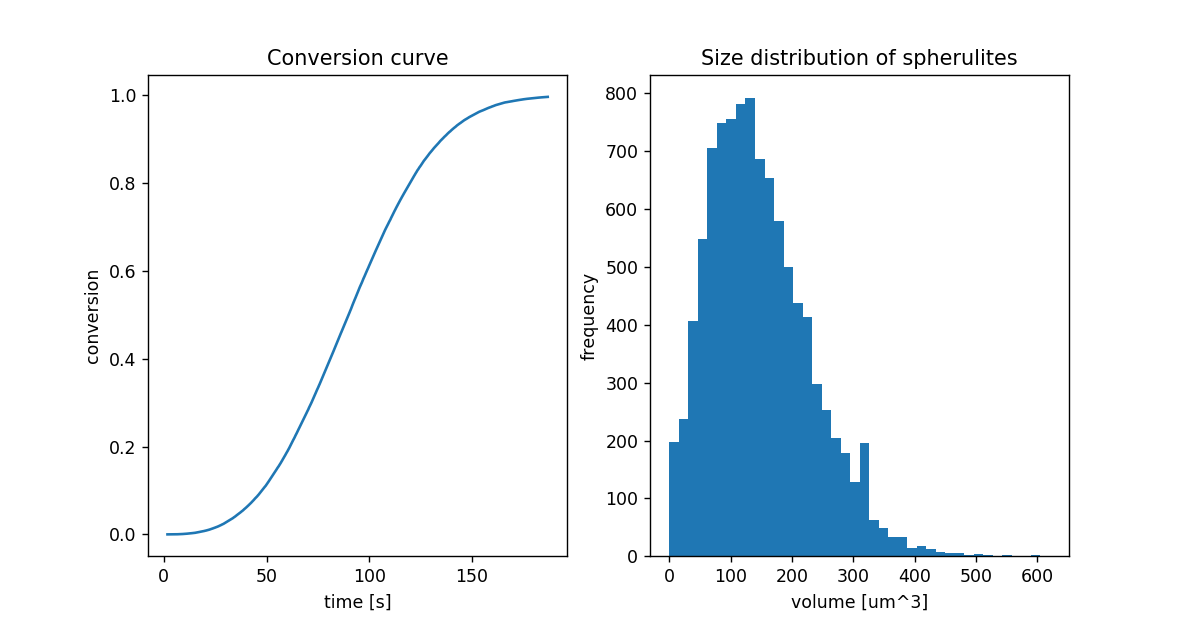

Text(0.5, 1.0, 'Size distribution of spherulites')

In [3]:
#

G = 0.03277 # um/s
F = 3.589E-7 # 1/s/um^3
rho_inst = 0.006705 # 1/um^3


(t1, k1, vol_arr, N_thrm, N_inst, VV) = pcrystal2.fcrystal_cdf(rho_inst, F, G, verbose = True)

# inds = np.logical_and(k1 > 0.05,k1<0.99)


# plt.plot(t1[inds], np.interp(t1[inds],pp119_1[:,0],pp119_1[:,1]/100.), label = 'exp')

# plt.plot(t1[inds],k1[inds])
fig, axs = plt.subplots(1,2,figsize = (9.5,5))
axs[0].plot(t1, k1)
axs[0].set_xlabel("time [s]")
axs[0].set_ylabel("conversion")
axs[0].set_title("Conversion curve")

axs[1].hist(vol_arr, bins = 40)
axs[1].set_xlabel("volume [um^3]")
axs[1].set_ylabel("frequency")
axs[1].set_title("Size distribution of spherulites")
# plt.legend()

# print(np.sum((np.interp(t1,pp119_1[:,0],pp119_1[:,1]/100.) - k1)**2)/len(t1))

# Standard deviation
* +/- 2 sigma standard deviation contains 95.45% probability
* +/- 3 sigma std - 97.73% probability

# Test number of test points

<IPython.core.display.Javascript object>


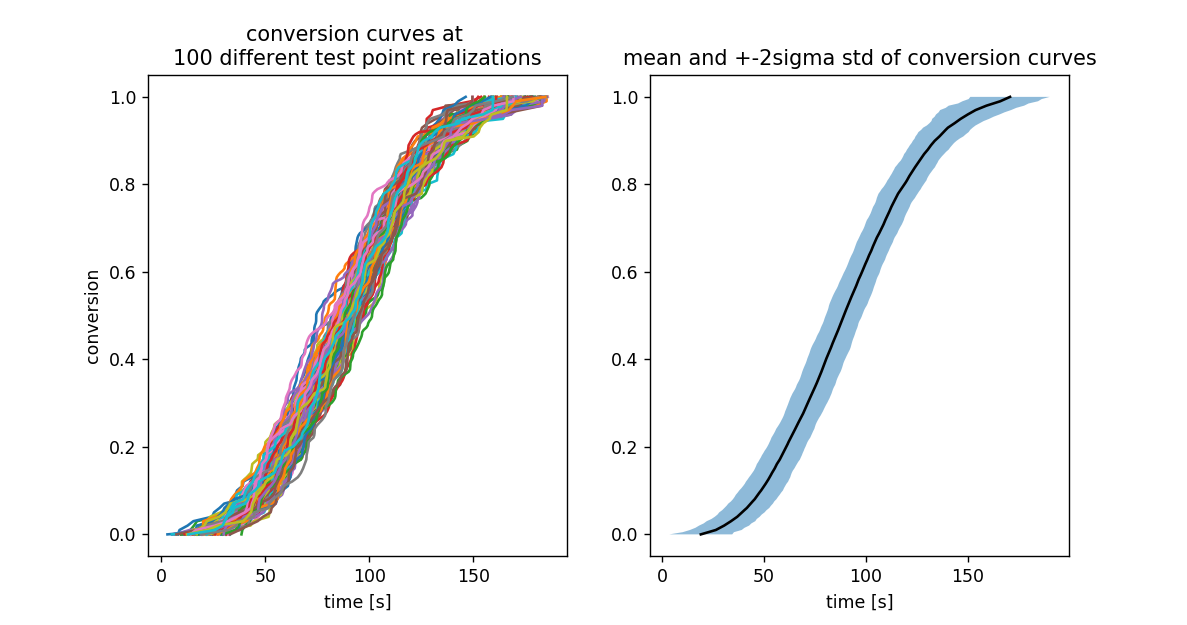

Text(0.5, 0, 'time [s]')

In [32]:
# perform initial simulation to determine a unique nuclei configuration

G = 0.03277 # um/s
F = 3.589E-7 # 1/s/um^3
rho_inst = 0.006705 # 1/um^3

centers, birth_times, cube_length, tmax, N_inst = pcrystal2.fcrystal_init(rho_inst, F, G, N_sphs = 10000, verbose = False)

k_arr = np.linspace(0,1,num=200)

n_test = 100
n_iter = 100

t_arrays = []

fig, axs = plt.subplots(1, 2, figsize = (9.5, 5))
for ii in range(n_iter):
    (ts, ks, vols_arr) = pcrystal2.fcrystal_main(centers, birth_times, cube_length, G, tmax, n_test)
    t_arr = np.interp(k_arr, ks, ts)
    t_arrays.append(t_arr)
    axs[0].plot(t_arr, k_arr)

axs[0].set_title('conversion curves at \n100 different test point realizations')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('conversion')

t_mean = np.mean(np.array(t_arrays), axis = 0)
t_std = np.std(np.array(t_arrays), axis = 0)
axs[1].plot(t_mean, k_arr, 'k-')
axs[1].fill_betweenx(k_arr, t_mean-2*t_std, t_mean+2*t_std, alpha = 0.5)
axs[1].set_title("mean and +-2sigma std of conversion curves")
axs[1].set_xlabel('time [s]')


100
200
500
1000
2000
5000
10000
20000
50000
100000


<IPython.core.display.Javascript object>


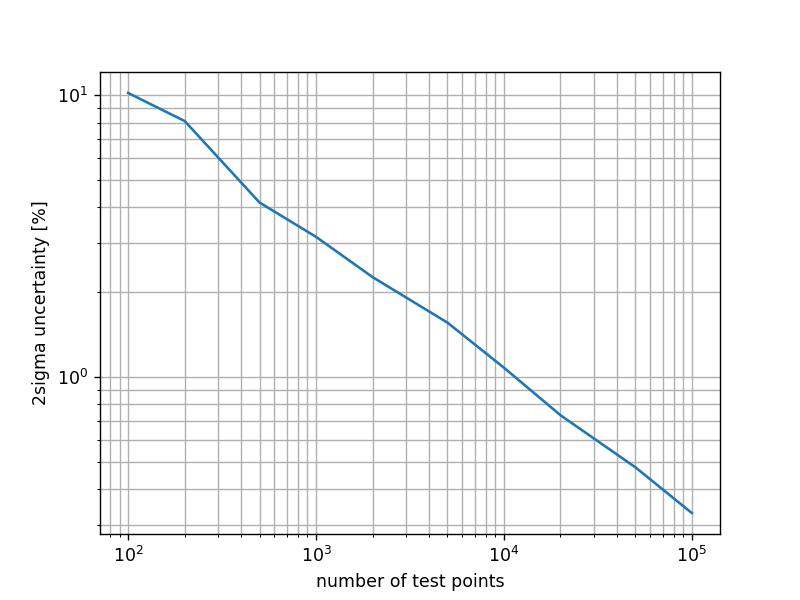

In [26]:
# perform initial simulation to determine a unique nuclei configuration

G = 0.03277 # um/s
F = 3.589E-7 # 1/s/um^3
rho_inst = 0.006705 # 1/um^3

centers, birth_times, cube_length, tmax, N_inst = pcrystal2.fcrystal_init(rho_inst, F, G, N_sphs = 10000, verbose = False)


##################################################################
# perform simulation at different numer of test points. 100 different configurations at each test point number


# k_arr = np.linspace(0,1,num=200)
t_arr = np.linspace(0, tmax, num=200)
std_err = []

n_test_list = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
n_iter = 100
for n_test in n_test_list:
    print(n_test)

    # t_arrays = []
    k_arrays = []

    for ii in range(n_iter):
        (ts, ks, vols_arr) = pcrystal2.fcrystal_main(centers, birth_times, cube_length, G, tmax, n_test)
        # t_interp = np.interp(k_arr, ks, ts)
        # t_arrays.append(t_interp)
        k_interp = np.interp(t_arr, ts, ks)
        k_arrays.append(k_interp)

#     t_mean = np.mean(np.array(t_arrays), axis = 0)
#     t_std = np.std(np.array(t_arrays), axis = 0)
    
    # k_mean = np.mean(np.array(k_arrays), axis = 0)
    k_std = np.std(np.array(k_arrays), axis = 0)
    
    std_err.append(np.amax(k_std))

plt.figure()
plt.loglog(n_test_list, 2*np.array(std_err)*100)
plt.xlabel('number of test points')
plt.ylabel('2sigma uncertainty [%]')
plt.grid(which='both')

# Test number of spherulites

<IPython.core.display.Javascript object>


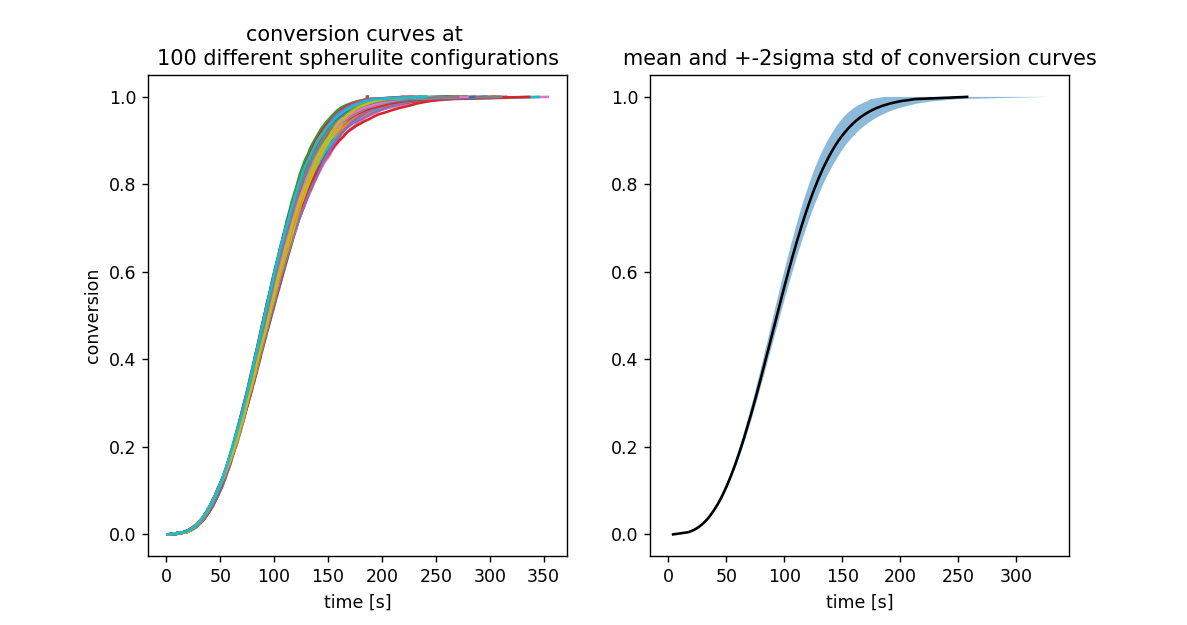

Text(0.5, 0, 'time [s]')

In [30]:
# perform initial simulation to determine a unique nuclei configuration

G = 0.03277 # um/s
F = 3.589E-7 # 1/s/um^3
rho_inst = 0.006705 # 1/um^3

k_arr = np.linspace(0,1,num=200)

n_sphs = 100
n_iter = 100
t_arrays = []

fig, axs = plt.subplots(1, 2, figsize = (9.5, 5))
for ii in range(n_iter):
    (ts, ks, vols_arr, n_thrm, n_inst, comp_vol) = pcrystal2.fcrystal_cdf(rho_inst, F, G, n_test = n_sphs*100, N_sphs = n_sphs)
    t_arr = np.interp(k_arr, ks, ts)
    t_arrays.append(t_arr)
    axs[0].plot(t_arr, k_arr)

axs[0].set_title('conversion curves at \n100 different spherulite configurations')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('conversion')

t_mean = np.mean(np.array(t_arrays), axis = 0)
t_std = np.std(np.array(t_arrays), axis = 0)
axs[1].plot(t_mean, k_arr, 'k-')
axs[1].fill_betweenx(k_arr, t_mean-2*t_std, t_mean+2*t_std, alpha = 0.5)
axs[1].set_title("mean and +-2sigma std of conversion curves")
axs[1].set_xlabel('time [s]')


100
200
500
1000
2000
5000
10000


<IPython.core.display.Javascript object>


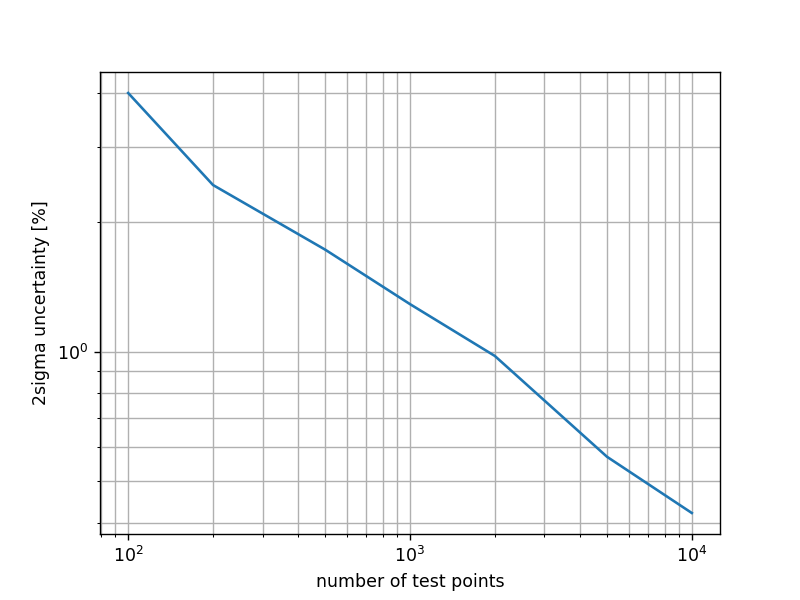

In [36]:
# perform initial simulation to determine a unique nuclei configuration

G = 0.03277 # um/s
F = 3.589E-7 # 1/s/um^3
rho_inst = 0.006705 # 1/um^3

# only to get tmax for interpolation boundary
centers, birth_times, cube_length, tmax, N_inst = pcrystal2.fcrystal_init(rho_inst, F, G, N_sphs = 10000, verbose = False)
t_arr = np.linspace(0, tmax*2, num=400)
    
std_err = []
running_time = []

n_sphs_list = [100, 200, 500, 1000, 2000, 5000, 10000]
n_iter = 100
for n_sphs in n_sphs_list:
    print(n_sphs)
    k_arrays = []    
    
    t0 = time()
    for ii in range(n_iter):
        (ts, ks, vols_arr, n_thrm, n_inst, comp_vol) = pcrystal2.fcrystal_cdf(rho_inst, F, G, 
                                                                              n_test = n_sphs*100, N_sphs = n_sphs)
        # t_interp = np.interp(k_arr, ks, ts)
        # t_arrays.append(t_interp)
        k_interp = np.interp(t_arr, ts, ks)
        k_arrays.append(k_interp)

#     t_mean = np.mean(np.array(t_arrays), axis = 0)
#     t_std = np.std(np.array(t_arrays), axis = 0)
    
    # k_mean = np.mean(np.array(k_arrays), axis = 0)
    t1 = time()
    running_time.append((t1-t0)/n_iter)
    
    k_std = np.std(np.array(k_arrays), axis = 0)
    std_err.append(np.amax(k_std))

plt.figure()
plt.loglog(n_sphs_list, 2*np.array(std_err)*100)
plt.xlabel('number of test points')
plt.ylabel('2sigma uncertainty [%]')
plt.grid(which='both')

plt.figure()
plt.loglog(n_sphs_list, running_time)
plt.xlabel('number of test points')
plt.ylabel('running time in s')
plt.grid(which='both')

# Conversion curve fitting

In [3]:
def residual_array(params, t_exp, k_exp, G, plot = False, verbose = 1, min_vf = 0.05, max_vf = 0.99):
    """
    The program calculates the volume fraction curve vs. time for the given parameters.
    Plots the experimental data with the calculated one between min_vf and max_vf (in case of exp. data)
      with the time axis aligned so that the curves are at the same position at 50% volume fraction
    Calculates the difference at each time-point between the calculated and experimental data.
    
    params: [log10(rho_inst), log10(F)], where 
            - rho_inst is the density of instantaneously born seeds [1/um^3]
            - F is the birthspeed of thermal seeds [1/(um^3 * s)]
    t_exp:  time data of the DSC measurement in seconds
    k_exp:  volume fraction data of the DSC measurement. 0 < k_exp < 100
    G:      growth speed [um/s], constant currently
    
    returns the difference vector between experimental and calculated volume fraction
    """
    #                                                    rho_inst,     F,            G
    (t1, k1, vols, N_thrm, N_inst, VV) = pcrystal2.fcrystal_cdf(10**params[0], 10**params[1], G, verbose = (verbose > 1))
    inds = np.logical_and(k_exp > min_vf*100, k_exp < max_vf*100)
    
    t1_center = t1[np.nonzero(k1>=0.5)[0][0]]
    texp_center = t_exp[np.nonzero(k_exp>=50)[0][0]]
    
    y = np.interp(t_exp[inds]-texp_center, t1-t1_center, k1)
    
    if plot:
        plt.figure()
        plt.plot(t_exp[inds]-texp_center,k_exp[inds]/100,label = 'exp')
        plt.plot(t_exp[inds]-texp_center,y,label = 'calc')
        plt.xlabel('time')
        plt.title('cdf')
        plt.legend()
        
        plt.figure()
        plt.hist((vols*3./4/np.pi)**(1./3), bins=10, color = (0,0,1,0.5))
        plt.xlabel('equiv. radius [um]')
        plt.ylabel('frequency')
        plt.title('size distribution')
    
    if verbose > 0:
        print("rho_i     rho_t     F         G         f_i       f_t       cost")
        print("{:<10.4g}{:<10.4g}{:<10.4g}{:<10.4g}{:<10.2%}{:<10.2%}{:<10.4g}".
              format(10**params[0], N_thrm/VV, 10**params[1], G, N_inst/float(N_thrm+N_inst), N_thrm/float(N_thrm+N_inst),0.5*np.sum((k_exp[inds]/100. - y)**2)))
        print("")
    
    return k_exp[inds]/100. - y

In [4]:
def residual_F(parF, rho_i, t_exp, k_exp, G, plot = False, verbose = 1, min_vf = 0.05, max_vf = 0.99):
    """
    The program calculates the volume fraction curve vs. time for the given parameters.
    Plots the experimental data with the calculated one between min_vf and max_vf (in case of exp. data)
      with the time axis aligned so that the curves are at the same position at 50% volume fraction
    Calculates the difference at each time-point between the calculated and experimental data.
    
    parF:  log10(F), where F is the birthspeed of thermal seeds [1/(um^3 * s)]
    rho_i:  density of instantaneously born seeds [1/um^3]
    t_exp:  time data of the DSC measurement in seconds!
    k_exp:  volume fraction data of the DSC measurement. 0 < k_exp < 100
    G:      growth speed [um/s], constant currently
    min_vf, max_vf:
            minimal and maximal volume fraction to be clipped.
    
    returns the difference vector between experimental and calculated volume fraction
    """
    if not np.isscalar(parF):
        parF = parF[0]
    #                                                         rho_inst,     F,            G
    (t1, k1, vols, N_thrm, N_inst, VV) = pcrystal2.fcrystal_cdf(rho_i, 10**parF, G, verbose=(verbose > 1))
    inds = np.logical_and(k_exp > min_vf*100, k_exp < max_vf*100)
    
    t1_center = t1[np.nonzero(k1>=0.5)[0][0]]
    texp_center = t_exp[np.nonzero(k_exp>=50)[0][0]]
    
    y = np.interp(t_exp[inds]-texp_center, t1-t1_center, k1)
    
    if plot:
        plt.figure()
        plt.plot(t_exp[inds]-texp_center,k_exp[inds]/100,label = 'exp')
        plt.plot(t_exp[inds]-texp_center,y,label = 'calc')
        plt.xlabel('time')
        plt.title('cdf')
        plt.legend()
        
        plt.figure()
        plt.hist((vols*3./4/np.pi)**(1./3), bins=10, color = (0,0,1,0.5))
        plt.xlabel('equiv. radius [um]')
        plt.ylabel('frequency')
        plt.title('size distribution')
    
    if verbose > 0:
        print("rho_i     rho_t     F         G         f_i       f_t       cost")
        print("{:<10.4g}{:<10.4g}{:<10.4g}{:<10.4g}{:<10.2%}{:<10.2%}{:<10.4g}".
              format(rho_i, N_thrm/VV, 10**parF, G, N_inst/float(N_thrm+N_inst), N_thrm/float(N_thrm+N_inst),0.5*np.sum((k_exp[inds]/100. - y)**2)))
        print("")
    
    return k_exp[inds]/100. - y

In [5]:
def residual_rhoi(parRho_i, F, t_exp, k_exp, G, plot = False, verbose = 1, min_vf = 0.05, max_vf = 0.99, nbins = 10):
    """
    The program calculates the volume fraction curve vs. time for the given parameters.
    Plots the experimental data with the calculated one between min_vf and max_vf (in case of exp. data)
      with the time axis aligned so that the curves are at the same position at 50% volume fraction
    Calculates the difference at each time-point between the calculated and experimental data.
    
    parRho_i:  log10(rho_i), where rho_i is the density of instantaneously born seeds [1/um^3]
    F:         birthspeed of thermal seeds [1/(um^3 * s)]
    t_exp:     time data of the DSC measurement in seconds!
    k_exp:     volume fraction data of the DSC measurement. 0 < k_exp < 100
    G:         growth speed [um/s], constant currently
    min_vf, max_vf:
               minimal and maximal volume fraction to be clipped.
    
    returns the difference vector between experimental and calculated volume fraction
    """
    
    if not np.isscalar(parRho_i):
        parRho_i = parRho_i[0]
    #                                                         rho_inst,     F,            G
    (t1, k1, vols, N_thrm, N_inst, VV) = pcrystal2.fcrystal_cdf(10**parRho_i, F, G, verbose = (verbose > 1))
    inds = np.logical_and(k_exp > min_vf*100, k_exp < max_vf*100)
    
    t1_center = t1[np.nonzero(k1>=0.5)[0][0]]
    texp_center = t_exp[np.nonzero(k_exp>=50)[0][0]]
    
    y = np.interp(t_exp[inds]-texp_center, t1-t1_center, k1)
    
    if plot:
        plt.figure()
        plt.plot(t_exp[inds]-texp_center,k_exp[inds]/100,label = 'exp')
        plt.plot(t_exp[inds]-texp_center,y,label = 'calc')
        plt.xlabel('time')
        plt.title('cdf')
        plt.legend()
        
        plt.figure()
        plt.hist((vols*3./4/np.pi)**(1./3), bins=nbins, color = (0,0,1,0.5))
        plt.xlabel('equiv. radius [um]')
        plt.ylabel('frequency')
        plt.title('size distribution')
    
    if verbose > 0:
        print("rho_i     rho_t     F         G         f_i       f_t       cost")
        print("{:<10.4g}{:<10.4g}{:<10.4g}{:<10.4g}{:<10.2%}{:<10.2%}{:<10.4g}".
              format(10**parRho_i, N_thrm/VV, F, G, N_inst/float(N_thrm+N_inst), N_thrm/float(N_thrm+N_inst),0.5*np.sum((k_exp[inds]/100. - y)**2)))
        print("")
    
    return k_exp[inds]/100. - y

# Fit 125 / 2

## Fit both F and rho_i

In [6]:
pp125_2 = np.loadtxt("../../../../experimental/G_20190314/Könnyen szimulálható görbék/H649FH_NX8000_1500ppm_135fok_20190225_konv.txt",skiprows=3)

t_exp = pp125_2[:,0]*60.
k_exp = pp125_2[:,1]
G = 3.28E-2

p0 = [-6, -10] # rho_inst0, F0
res_lsq = least_squares(residual_array, p0, args=(t_exp, k_exp, G), verbose = 2, method = 'trf',
                        diff_step = 0.2)

rho_i     rho_t     F         G         f_i       f_t       cost
1e-06     2.177e-07 1e-10     0.0328    82.13%    17.87%    9.243     

rho_i     rho_t     F         G         f_i       f_t       cost
6.31e-08  7.383e-07 1e-10     0.0328    7.87%     92.13%    23.79     

rho_i     rho_t     F         G         f_i       f_t       cost
1e-06     1.911e-09 1e-12     0.0328    99.81%    0.19%     9.886     

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.2425e+00                                    9.25e+00    
rho_i     rho_t     F         G         f_i       f_t       cost
3.424e-05 401.5     36.35     0.0328    0.00%     100.00%   39.26     

rho_i     rho_t     F         G         f_i       f_t       cost
7.103e-05 8.008e-06 1.787e-08 0.0328    89.87%    10.13%    9.534     

rho_i     rho_t     F         G         f_i       f_t       cost
5.351e-06 1.028e-07 1.059e-10 0.0328    98.11%    1.89%     0.3519  

## Fit only rhoi, F = 1E-10

In [9]:
pp125_2 = np.loadtxt("../2017_04_11_konverzio_gorbek/iPP_125°C_0316_2_conv1.txt",skiprows=3)
t_exp = pp125_2[:,0]*60.
k_exp = pp125_2[:,1]
G = 0.19727
F0 = 1E-10

logrhoi0 = -6. # rho_inst0, F0
res_lsq = least_squares(residual_rhoi, logrhoi0, args=(F0, t_exp, k_exp, G), verbose = 2, method = 'lm',
                        diff_step = 0.2)

1e-06 1e-10 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
1e-06     2.992e-08 1e-10     0.1973    97.09%    2.91%     0.5864    

1e-06 1e-10 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
1e-06     3.102e-08 1e-10     0.1973    96.99%    3.01%     0.6068    

1e-06 1e-10 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
1e-06     2.728e-08 1e-10     0.1973    97.34%    2.66%     0.5659    

1.584893192461114e-05 1e-10 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
1.585e-05 1.587e-08 1e-10     0.1973    99.90%    0.10%     1.293     

2.977508407910246e-06 1e-10 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
2.978e-06 2.176e-08 1e-10     0.1973    99.27%    0.73%     0.01846   

3.793869579443272e-05 1e-10 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
3.794e-05 1.139e-08 1e-10     0.1973    99.97%    0.03%     2.431     

2.89369430

2.8936926487075456e-06 1e-10 0.19727
N_thrm0   N_inst    LL        tmax
0         1e+04     1512      0.02894   
0         1e+04     1512      0.2894    
1         9999      1512      2.894     
10        9990      1511      28.94     
50        9950      1509      144.7     
148       9852      1504      434.1     
f_inst    f_therm
99.37%    0.63%     


<IPython.core.display.Javascript object>


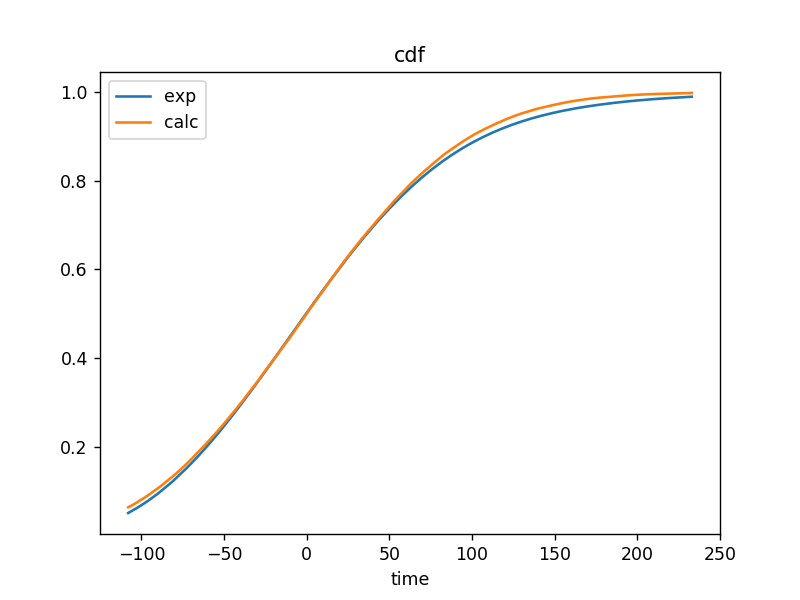

<IPython.core.display.Javascript object>


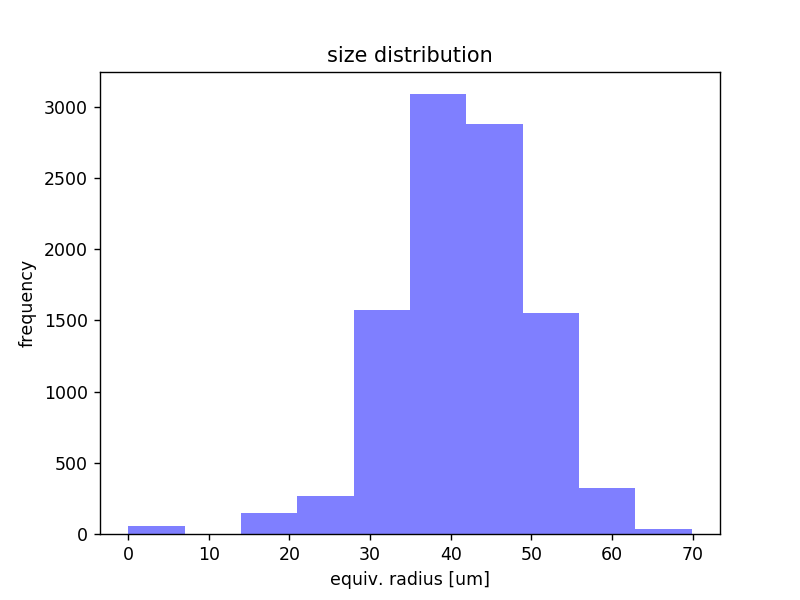

rho_i     rho_t     F         G         f_i       f_t       cost
2.894e-06 1.821e-08 1e-10     0.1973    99.37%    0.63%     0.02241   

0.01612   24.42     


In [10]:
residual_rhoi(res_lsq.x, F0,t_exp, k_exp, G, plot=True, verbose=1);
print("{:<10.4g}{:<10.4g}".format(res_lsq.cost, res_lsq.optimality))

## Fit only rhoi, F = 1E-9

In [11]:
pp125_2 = np.loadtxt("../2017_04_11_konverzio_gorbek/iPP_125°C_0316_2_conv1.txt",skiprows=3)
t_exp = pp125_2[:,0]*60.
k_exp = pp125_2[:,1]
G = 0.19727
F0 = 1E-9

logrhoi0 = -6. # rho_inst0, F0
res_lsq = least_squares(residual_rhoi, logrhoi0, args=(F0, t_exp, k_exp, G), verbose = 2, method = 'lm',
                        diff_step = 0.2)

1e-06 1e-09 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
1e-06     5.298e-07 1e-09     0.1973    65.37%    34.63%    0.4678    

1e-06 1e-09 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
1e-06     5.388e-07 1e-09     0.1973    64.99%    35.01%    0.4754    

1e-06 1e-09 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
1e-06     5.38e-07  1e-09     0.1973    65.02%    34.98%    0.4772    

1.584893192461114e-05 1e-09 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
1.585e-05 1.164e-07 1e-09     0.1973    99.27%    0.73%     1.293     

2.8129116700347216e-06 1e-09 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
2.813e-06 2.201e-07 1e-09     0.1973    92.74%    7.26%     0.01723   

3.6251407723651894e-05 1e-09 0.19727
rho_i     rho_t     F         G         f_i       f_t       cost
3.625e-05 9.472e-08 1e-09     0.1973    99.74%    0.26%     2.378     

2.877381

2.8773819476633234e-06 1e-09 0.19727


<IPython.core.display.Javascript object>


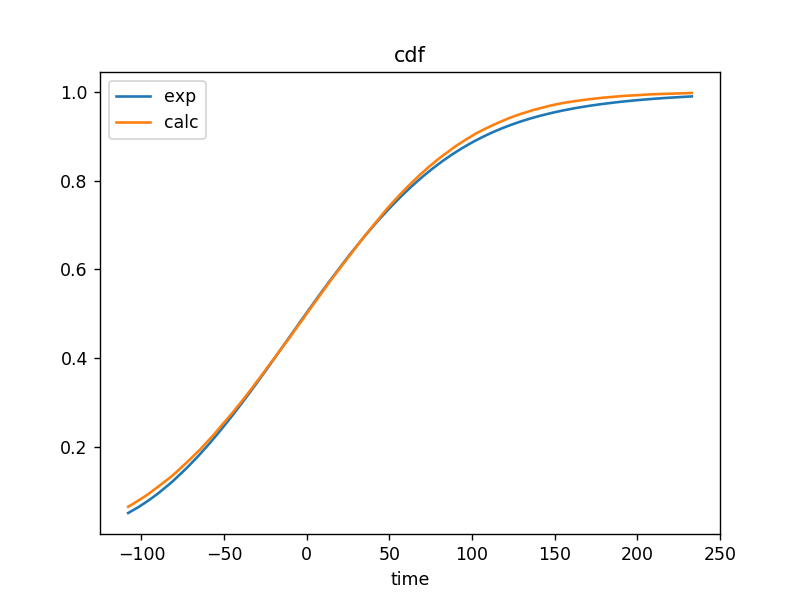

<IPython.core.display.Javascript object>


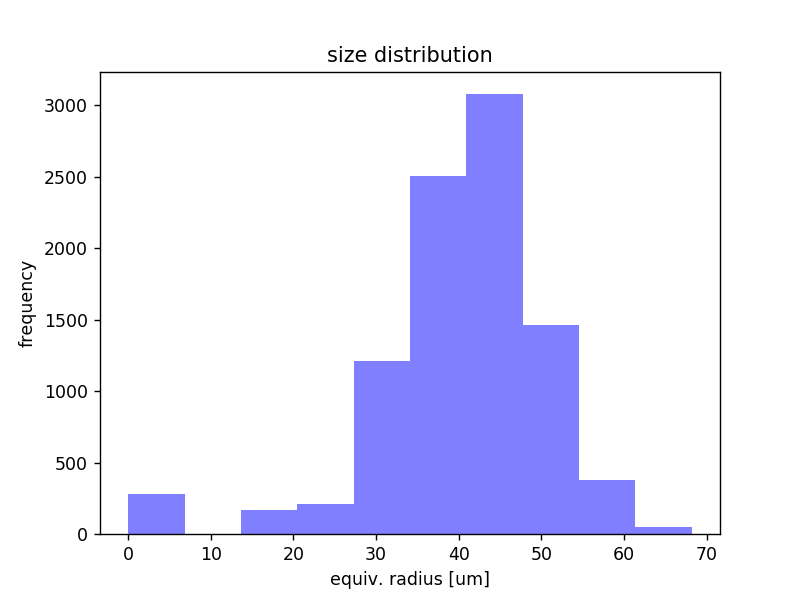

rho_i     rho_t     F         G         f_i       f_t       cost
2.877e-06 2.108e-07 1e-09     0.1973    93.17%    6.83%     0.02164   

0.01584   17.03     


In [12]:
residual_rhoi(res_lsq.x, F0,t_exp, k_exp, G, plot=True, verbose=1);
print("{:<10.4g}{:<10.4g}".format(res_lsq.cost, res_lsq.optimality))

## Fit only rhoi, F = 1E-8

In [6]:
pp125_2 = np.loadtxt("../2017_04_11_konverzio_gorbek/iPP_125°C_0316_2_conv1.txt",skiprows=3)
t_exp = pp125_2[:,0]*60.
k_exp = pp125_2[:,1]
G = 0.19727
F0 = 1E-8

logrhoi0 = -6. # rho_inst0, F0
res_lsq = least_squares(residual_rhoi, logrhoi0, args=(F0, t_exp, k_exp, G), verbose = 2, method = 'lm',
                        diff_step = 0.2)

rho_i     rho_t     F         G         f_i       f_t       cost
1e-06     4.08e-06  1e-08     0.1973    19.69%    80.31%    0.06523   

rho_i     rho_t     F         G         f_i       f_t       cost
1e-06     4.104e-06 1e-08     0.1973    19.60%    80.40%    0.06658   

rho_i     rho_t     F         G         f_i       f_t       cost
1e-06     4.099e-06 1e-08     0.1973    19.62%    80.38%    0.07126   

rho_i     rho_t     F         G         f_i       f_t       cost
1.585e-05 1.241e-06 1e-08     0.1973    92.74%    7.26%     1.337     

rho_i     rho_t     F         G         f_i       f_t       cost
1.509e-06 3.618e-06 1e-08     0.1973    29.43%    70.57%    0.04153   

rho_i     rho_t     F         G         f_i       f_t       cost
2.203e-05 1.049e-06 1e-08     0.1973    95.45%    4.55%     1.734     

rho_i     rho_t     F         G         f_i       f_t       cost
1.722e-06 3.965e-06 1e-08     0.1973    30.28%    69.72%    0.03322   

rho_i     rho_t     F         G         f

<IPython.core.display.Javascript object>


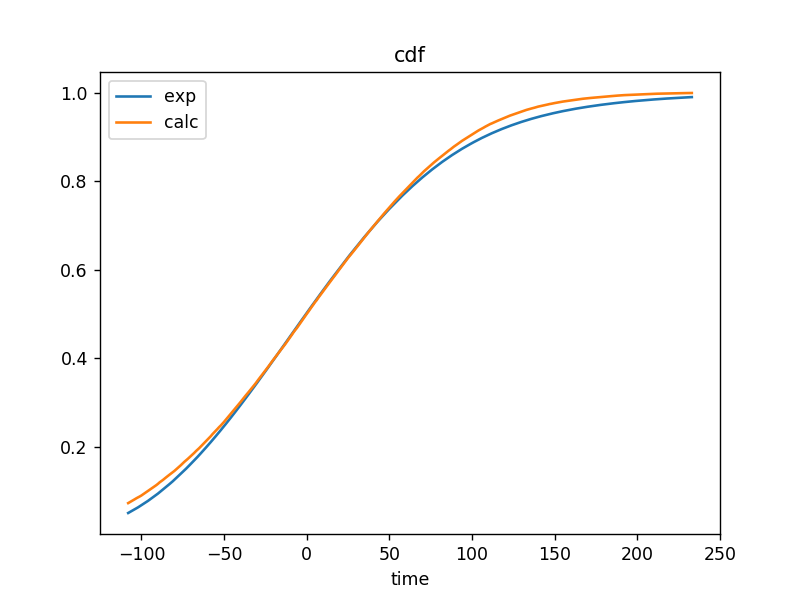

<IPython.core.display.Javascript object>


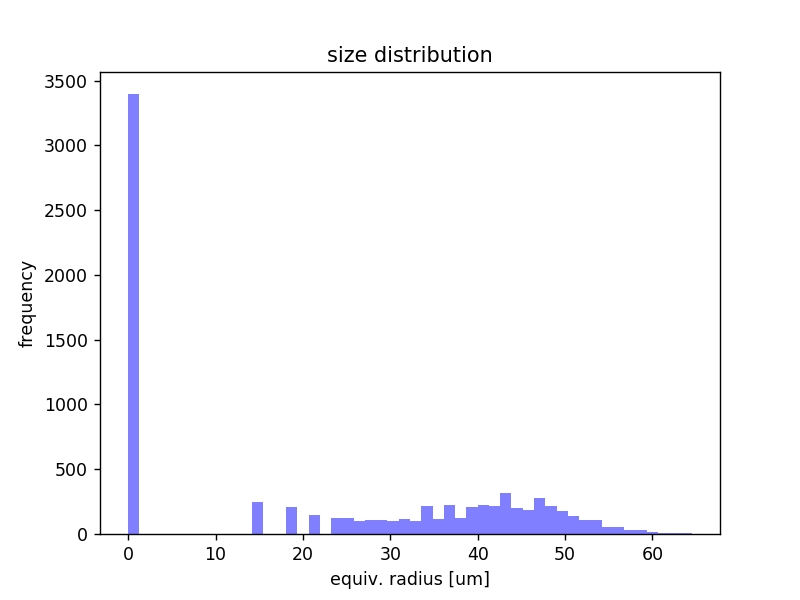

rho_i     rho_t     F         G         f_i       f_t       cost
1.845e-06 4.176e-06 1e-08     0.1973    30.64%    69.36%    0.03888   

0.02807   4.6       


In [8]:
residual_rhoi(res_lsq.x, F0,t_exp, k_exp, G, plot=True, verbose=1, nbins=50);
print("{:<10.4g}{:<10.4g}".format(res_lsq.cost, res_lsq.optimality))

In [34]:
(t1, k1, vols, N_thrm, N_inst, VV) = pcrystal2.fcrystal_cdf(1.845e-6, 1e-8, G, verbose = False, n_test=1E5)

<IPython.core.display.Javascript object>


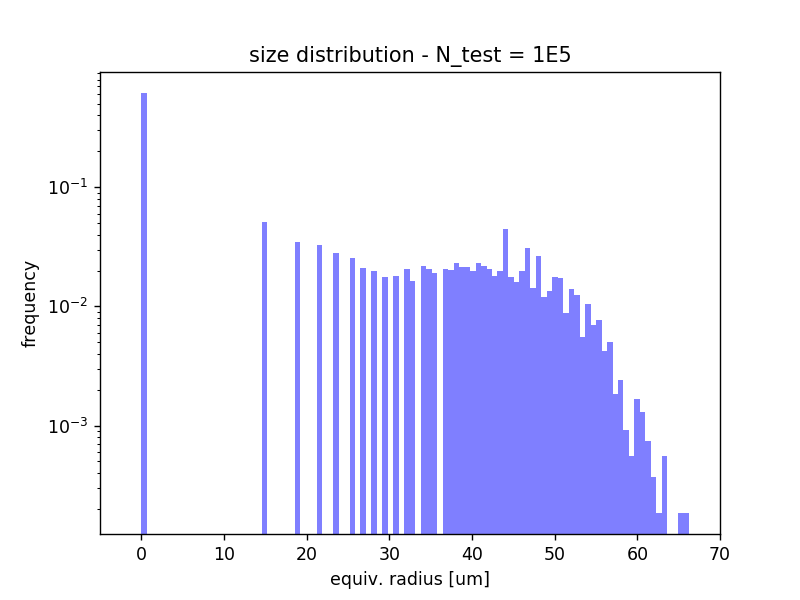

Text(0.5, 1.0, 'size distribution - N_test = 1E5')

In [36]:
plt.figure()
plt.hist((vols*3./4/np.pi)**(1./3), bins=100, color = (0,0,1,0.5), density=True, log=True)
plt.xlim(-5,70)
plt.xlabel('equiv. radius [um]')
plt.ylabel('')
plt.title('size distribution - N_test = 1E5')

In [37]:
(t1, k1, vols, N_thrm, N_inst, VV) = pcrystal2.fcrystal_cdf(1.845e-6, 1e-8, G, verbose = False, n_test=1E6)

<IPython.core.display.Javascript object>


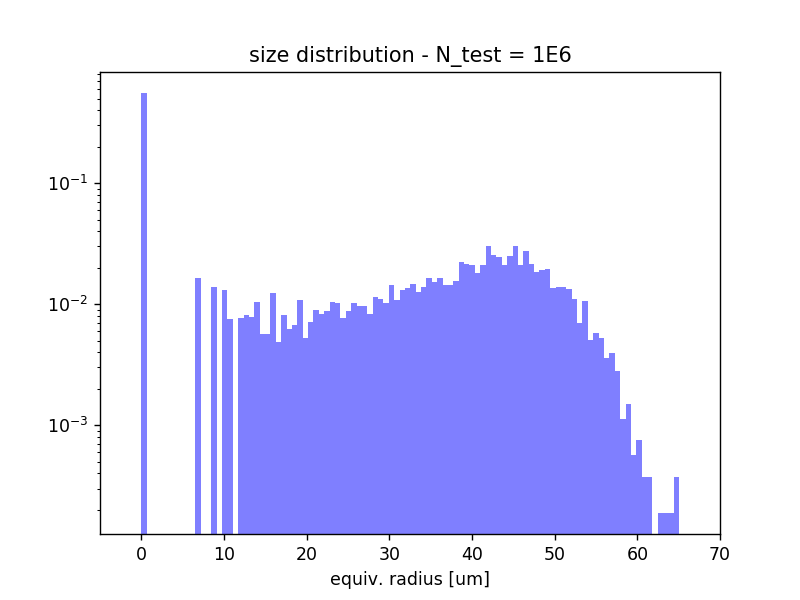

Text(0.5, 1.0, 'size distribution - N_test = 1E6')

In [38]:
plt.figure()
plt.hist((vols*3./4/np.pi)**(1./3), bins=100, color = (0,0,1,0.5), density=True, log=True)
plt.xlim(-5,70)
plt.xlabel('equiv. radius [um]')
plt.ylabel('')
plt.title('size distribution - N_test = 1E6')

In [39]:
(t1, k1, vols, N_thrm, N_inst, VV) = pcrystal2.fcrystal_cdf(1.845e-6, 1e-8, G, verbose = False, n_test=1E7)

<IPython.core.display.Javascript object>


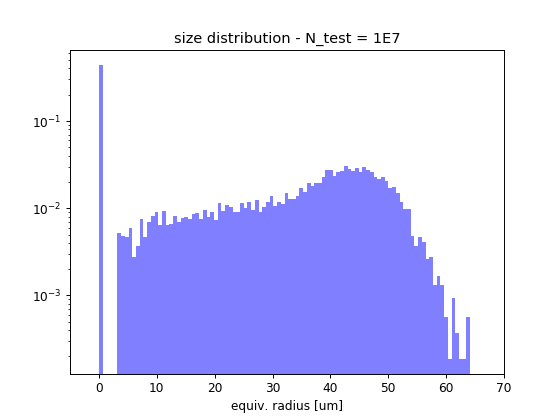

Text(0.5, 1.0, 'size distribution - N_test = 1E7')

In [42]:
plt.figure()
plt.hist((vols*3./4/np.pi)**(1./3), bins=100, color = (0,0,1,0.5), density=True, log=True)
plt.xlim(-5,70)
plt.xlabel('equiv. radius [um]')
plt.ylabel('')
plt.title('size distribution - N_test = 1E7')